# Simple Linear Regression

### 1. regression & predict

In [1]:
from statistics import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


cars = pd.read_csv('data/cars.csv')
speed = cars['speed']
dist = cars['dist']

# 1차원 List ---conversion--> 2차원 nupmyArray
speed = np.array(speed).reshape(50,1)
dist = np.array(dist).reshape(50,1)

# train set 과 test set 비율(8:2) 배분
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
train_X, test_X, train_y, test_y = train_test_split(speed, dist, test_size=0.2, random_state=123)  

model = LinearRegression()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print(np.concatenate((test_y, pred_y, test_y-pred_y), axis=1))# merge test set, pred set, error
print('Coefficients: {0:.2f}, Intercept {1:.3f}'.format(model.coef_[0][0], model.intercept_[0])) # 기울기와 절편
print('Mean squared error: {0:.2f}'.format(mean_squared_error(test_y, pred_y))) # 표준편차와 동일 낮을 수록 정확도 ^ but,직관성 떨어짐
print('Coefficient of determination: %.2f'% r2_score(test_y, pred_y)) # 최댓값이 1이며 1에 가까울 수록 정확도 ^

[[28.         25.221513    2.778487  ]
 [24.         29.18014184 -5.18014184]
 [50.         48.97328605  1.02671395]
 [92.         76.68368794 15.31631206]
 [46.         33.13877069 12.86122931]
 [ 2.         -2.48888889  4.48888889]
 [52.         60.84917258 -8.84917258]
 [20.         29.18014184 -9.18014184]
 [40.         48.97328605 -8.97328605]
 [34.         21.26288416 12.73711584]]
Coefficients: 3.96, Intercept -18.323
Mean squared error: 86.11
Coefficient of determination: 0.84


### 2. Plot Prediction Result

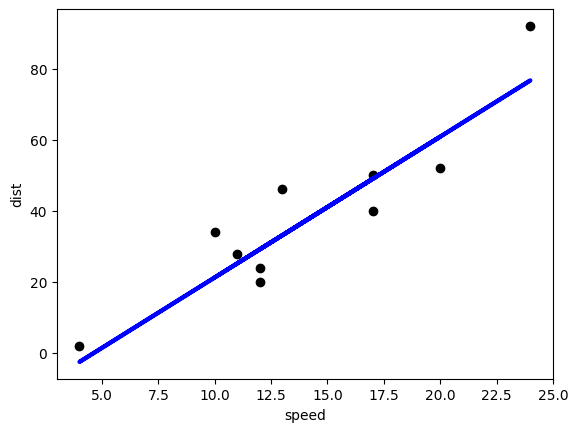

In [2]:
import matplotlib.pyplot as plt

plt.scatter(test_X, test_y, color='black')
plt.plot(test_X, pred_y, color='blue', linewidth=3)
plt.xlabel('speed')
plt.ylabel('dist')
plt.show()

# Multiple Linear Regression

### 1. regression & predict

In [3]:


df = pd.read_csv('data/prestige.csv')
df_X = df[['education','women','prestige']]
df_y = df['income']

df_X = np.array(df_X).reshape(102,3)
df_y = np.array(df_y).reshape(102,1)
# Split Data into train set & test set (8:2)
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size=0.2,random_state=123)
model = LinearRegression()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print(np.concatenate((test_y, pred_y), axis=1)) # [test set, pred set]
print('Coefficients: {0:.2f}, Intercept {1:.3f}'.format(model.coef_[0][0], model.intercept_[0])) # 기울기와 절편
print('Mean squared error: {0:.2f}'.format(mean_squared_error(test_y, pred_y))) # 직관성 떨어짐
print('Coefficient of determination: %.2f'% r2_score(test_y, pred_y)) # 최댓값이 1이며 1에 가까울 수록 정확도 ^

[[11377.         12258.44038253]
 [ 5134.          5159.34246076]
 [ 8880.          8363.1152474 ]
 [ 5092.          8070.60838686]
 [ 3000.           611.57316286]
 [12351.         10982.86171021]
 [11030.         12841.17595454]
 [ 8780.          7038.30456849]
 [ 5449.          6518.19905612]
 [ 8403.         11814.51860765]
 [25308.         13990.70934102]
 [ 3582.          2433.0815516 ]
 [ 6565.          6130.7498046 ]
 [ 3930.          3262.367887  ]
 [14558.         11359.10607204]
 [ 5511.          6003.35843254]
 [ 7147.          8425.12859899]
 [ 4330.          4631.29452279]
 [ 7956.          7585.19175788]
 [ 6686.          7271.80203605]
 [ 3148.          2851.83313408]]
Coefficients: 122.50, Intercept 81.627
Mean squared error: 8542487.84
Coefficient of determination: 0.65
